In [1]:
import torch
import torch.nn as nn
from ummon import *
import matplotlib.pyplot as plt

In [7]:
class Autoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 3)
        self.decoder = nn.Linear(3, 2)
    
    def forward(self, x):
        # share the weights
        # with torch.no_grad():
        #    self.decoder.weight.data = self.encoder.weight.data.transpose(0, 1)
        
        # autoencode
        x = self.encoder(x)
        x = nn.ReLU()(x)
        x = self.decoder(x)
        return x
    
    def fit(self, dl):
        loss = nn.MSELoss()
        opt = torch.optim.Adam(self.parameters())
        KamikazeTrainer(Logger(), self, loss, opt).fit(dl, epochs=60)
        return self
    
class AutoencoderNoBias(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 3, bias=False)
        self.decoder = nn.Linear(3, 2, bias=False)
    
    def forward(self, x):
        # share the weights
        # with torch.no_grad():
        #    self.decoder.weight.data = self.encoder.weight.data.transpose(0, 1)
        
        # autoencode
        x = self.encoder(x)
        x = nn.ReLU()(x)
        x = self.decoder(x)
        return x
    
    def fit(self, dl):
        loss = nn.MSELoss()
        opt = torch.optim.Adam(self.parameters())
        KamikazeTrainer(Logger(), self, loss, opt).fit(dl, epochs=60)
        return self
    
class TanhAutoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 3)
        self.decoder = nn.Linear(3, 2)
    
    def forward(self, x):
        # share the weights
        # with torch.no_grad():
        #    self.decoder.weight.data = self.encoder.weight.data.transpose(0, 1)
        
        # autoencode
        x = self.encoder(x)
        x = nn.Tanh()(x)
        x = self.decoder(x)
        return x
    
    def fit(self, dl):
        loss = nn.MSELoss()
        opt = torch.optim.Adam(self.parameters())
        KamikazeTrainer(Logger(), self, loss, opt).fit(dl, epochs=60)
        return self
    
    
class TanhAutoencoderNoBias(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 3, bias=False)
        self.decoder = nn.Linear(3, 2, bias=False)
    
    def forward(self, x):
        # share the weights
        # with torch.no_grad():
        #    self.decoder.weight.data = self.encoder.weight.data.transpose(0, 1)
        
        # autoencode
        x = self.encoder(x)
        x = nn.Tanh()(x)
        x = self.decoder(x)
        return x
    
    def fit(self, dl):
        loss = nn.MSELoss()
        opt = torch.optim.Adam(self.parameters())
        KamikazeTrainer(Logger(), self, loss, opt).fit(dl, epochs=60)
        return self
    
    
class LinearAutoencoder(nn.Module):
    
    def __init__(self):
        super().__init__()
        self.encoder = nn.Linear(2, 3)
        self.decoder = nn.Linear(3, 2)
    
    def forward(self, x):
        # share the weights
        # with torch.no_grad():
        #    self.decoder.weight.data = self.encoder.weight.data.transpose(0, 1)
        
        # autoencode
        x = self.encoder(x)
        x = self.decoder(x)
        return x
    
    def fit(self, dl):
        loss = nn.MSELoss()
        opt = torch.optim.Adam(self.parameters())
        KamikazeTrainer(Logger(), self, loss, opt).fit(dl, epochs=60)
        return self


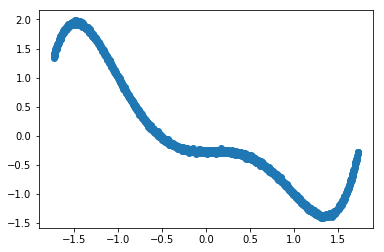

In [3]:
x = np.linspace(-1, 1, 2000)
y = -1 * (-400*x**5+450*x**3-50*x**2 + 4) + np.random.normal(0, 1, x.shape[0])

data = np.array((x, y)).T.astype(np.float32)
data = data - data.mean(axis=0)
data = data / data.std(axis=0)

X, y = data[:,0], data[:,1]
plt.plot(X, y, 'o')

p = np.random.permutation(data.shape[0])
X, X_val = torch.from_numpy(data[p[:1700]]), torch.from_numpy(data[p[1700:]])
ds = torch.utils.data.TensorDataset(X, X)
dl = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

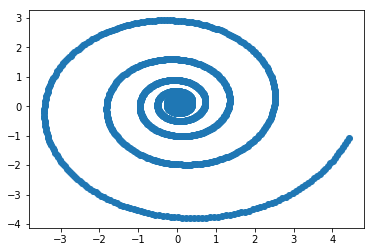

In [4]:
a=0.05
b=0.10
th=np.linspace(0, 50, 2000)  
x=a*np.exp(b*th)*np.cos(th)
y=a*np.exp(b*th)*np.sin(th)

data = np.array((x, y)).T.astype(np.float32)
data = data - data.mean(axis=0)
data = data / data.std(axis=0)

X, y = data[:,0], data[:,1]
plt.plot(X, y, 'o')
plt.show()

p = np.random.permutation(data.shape[0])
X, X_val = torch.from_numpy(data[p[:1700]]), torch.from_numpy(data[p[1700:]])
ds = torch.utils.data.TensorDataset(X, X)
dl_spiral = torch.utils.data.DataLoader(ds, batch_size=32, shuffle=True)

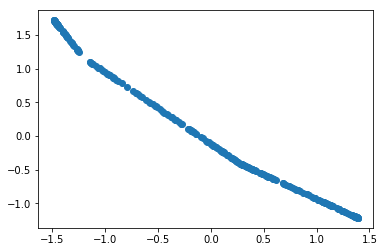

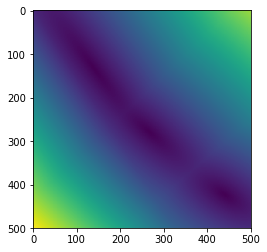

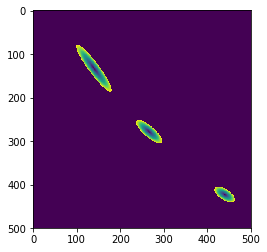

In [329]:
torch.manual_seed(1337)

model = Autoencoder().fit(dl)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-2, 2,500), np.linspace(-2, 2,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

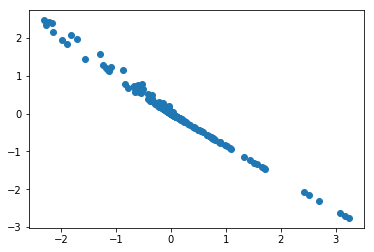

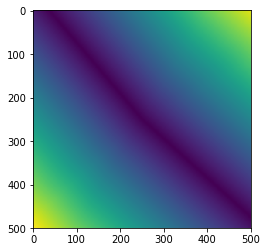

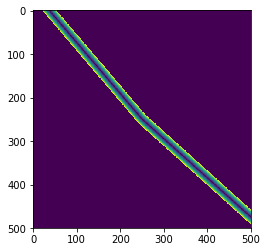

In [5]:
torch.manual_seed(1337)

model = AutoencoderNoBias().fit(dl)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-2, 2,500), np.linspace(-2, 2,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

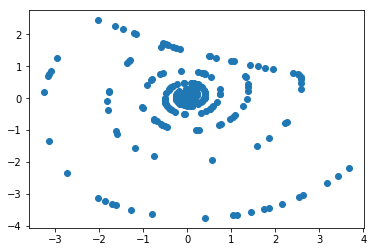

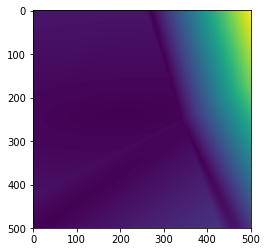

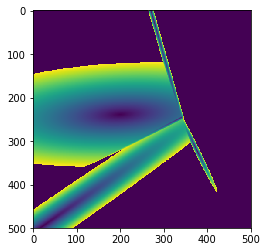

In [24]:
torch.manual_seed(1337)

model = Autoencoder().fit(dl_spiral)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-4, 4,500), np.linspace(-4, 4,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

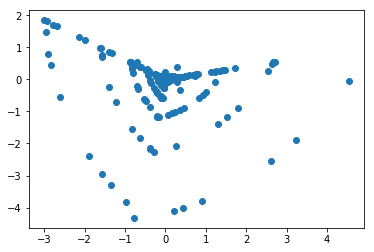

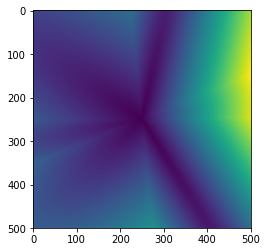

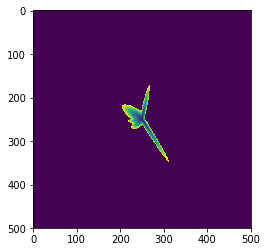

In [6]:
torch.manual_seed(1337)

model = AutoencoderNoBias().fit(dl_spiral)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-4, 4,500), np.linspace(-4, 4,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

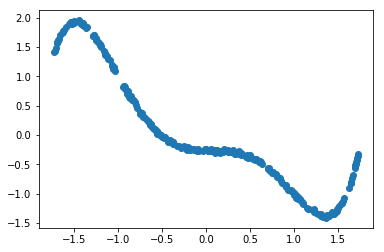

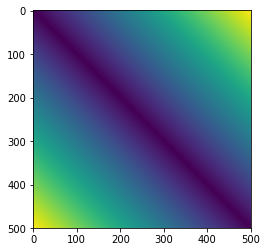

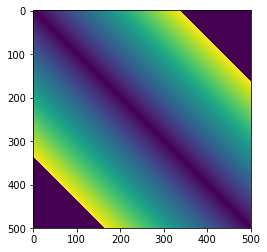

In [330]:
torch.manual_seed(1337)

model = LinearAutoencoder().fit(dl)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-2, 2,500), np.linspace(-2, 2,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()



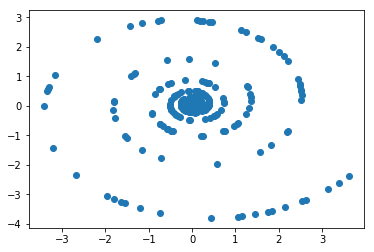

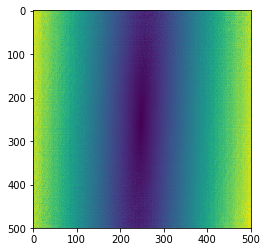

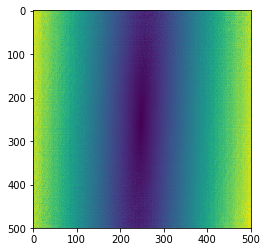

In [22]:
torch.manual_seed(1337)

model = LinearAutoencoder().fit(dl_spiral)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-2, 2,500), np.linspace(-2, 2,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()



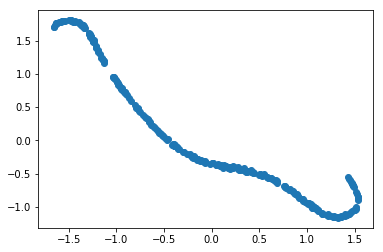

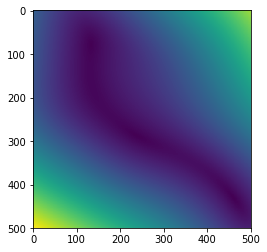

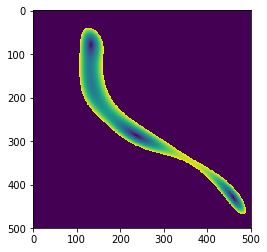

In [331]:
torch.manual_seed(1337)

model = TanhAutoencoder().fit(dl)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-2, 2,500), np.linspace(-2, 2,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

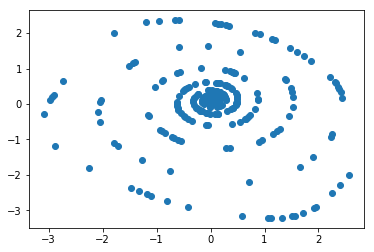

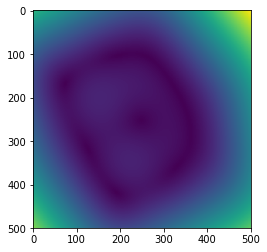

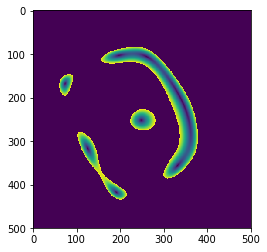

In [25]:
torch.manual_seed(1337)

model = TanhAutoencoder().fit(dl_spiral)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-4, 4,500), np.linspace(-4, 4,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

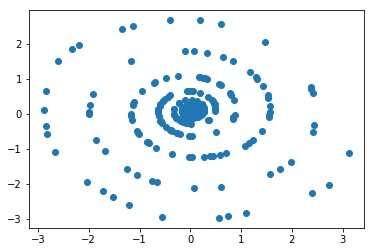

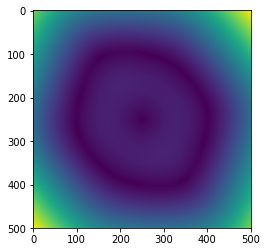

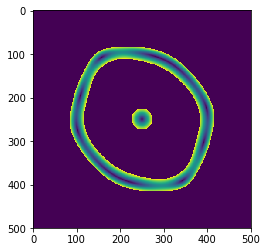

In [8]:
torch.manual_seed(1337)

model = TanhAutoencoderNoBias().fit(dl_spiral)

X_hat = model(X_val).detach().numpy()
plt.plot(X_hat[:,0], X_hat[:,1], 'o')
plt.show()

x, y = np.linspace(-4, 4,500), np.linspace(-4, 4,500)
points = np.transpose([np.tile(x, len(y)), np.repeat(y, len(x))]).astype(np.float32)

points_hat =  model(torch.from_numpy(points)).detach().numpy()
losses = np.linalg.norm(points_hat - points, axis=1)

result_im = np.rot90(losses.reshape(500,-1))

plt.imshow(result_im)
plt.show()

result_im_bin = result_im.copy()
result_im_bin[result_im >= 1e-1] = 0
plt.imshow(result_im_bin)
plt.show()

## Test

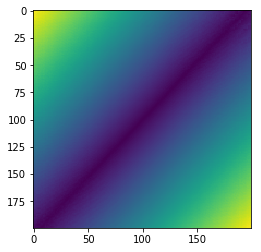

In [95]:
Z = np.zeros((200, 200))
for ii,i in enumerate(np.linspace(-2, 2,200)):
    for jj,j in enumerate(np.linspace(2, -2,200)):
        inpt = torch.from_numpy(np.array([[i,j]])).float()
        outpt = model(inpt).detach().numpy()
        Z[ii,jj] = np.linalg.norm(inpt.numpy() - outpt)
plt.imshow(Z)